In [1]:
!pip install tensorflow

  Using cached protobuf-4.23.4-cp310-abi3-win_amd64.whl (422 kB)
  Attempting uninstall: protobuf
    Found existing installation: protobuf 4.24.0
    Uninstalling protobuf-4.24.0:
      Successfully uninstalled protobuf-4.24.0


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
grpcio-tools 1.64.1 requires protobuf<6.0dev,>=5.26.1, but you have protobuf 4.23.4 which is incompatible.

[notice] A new release of pip available: 22.3.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
!pip install numpy pandas scikit-learn matplotlib tensorflow


[notice] A new release of pip available: 22.3.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler

In [6]:
data_path = pd.read_csv(r'C:\Users\15205\Desktop\ECE562-experiment\last data set3 LSTM\train_dataset.csv')

In [7]:
print("Initial Data:")
print(data_path.head())

Initial Data:
   Memory Address  Cache Set Access Type  Cycle Count  Data Size  Hit/Miss
0         1048576          0        READ            7         64         0
1         1052672         64        READ           11         64         0
2         1056768        128        READ           16         64         0
3         1060880        192        READ           21         64         0
4         1064968        256        READ           26         64         0


In [8]:
data_path['Access Type'] = data_path['Access Type'].replace({'READ': 0, 'WRITE': 1})


C:\Users\15205\AppData\Local\Temp\ipykernel_44504\1139181506.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_path['Access Type'] = data_path['Access Type'].replace({'READ': 0, 'WRITE': 1})


In [9]:
non_numeric_cols = data_path.select_dtypes(include=['object']).columns.tolist()
if non_numeric_cols:
    print(f"\nNon-numeric columns detected: {non_numeric_cols}")
    # Convert non-numeric columns to numeric or drop them
    # For simplicity, we'll drop them in this example
    data_path = data_path.drop(columns=non_numeric_cols)
    print("Non-numeric columns have been dropped.")

In [10]:
print("\nPreprocessed Data:")
print(data_path.head())


Preprocessed Data:
   Memory Address  Cache Set  Access Type  Cycle Count  Data Size  Hit/Miss
0         1048576          0            0            7         64         0
1         1052672         64            0           11         64         0
2         1056768        128            0           16         64         0
3         1060880        192            0           21         64         0
4         1064968        256            0           26         64         0


In [11]:
data = data_path.values

In [12]:
scaler = MinMaxScaler(feature_range=(0, 1))

In [13]:
data_scaled = scaler.fit_transform(data)

In [14]:
def create_sequences(data, seq_length):
    X = []
    y = []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length, :])   # Input sequence
        y.append(data[i + seq_length, :])     # Target value
    return np.array(X), np.array(y)

In [15]:
seq_length = 50

In [16]:
X, y = create_sequences(data_scaled, seq_length)

In [17]:
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

In [18]:
model = Sequential()

In [19]:
model.add(LSTM(units=50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))


In [20]:
model.add(Dense(units=y_train.shape[1]))

In [21]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [22]:
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/20

51949/51949 [==============================] - 485s 9ms/step - loss: 0.0742 - val_loss: 0.0987
Epoch 2/20
51949/51949 [==============================] - 468s 9ms/step - loss: 0.0714 - val_loss: 0.1023
Epoch 3/20
51949/51949 [==============================] - 466s 9ms/step - loss: 0.0707 - val_loss: 0.0995
Epoch 4/20
51949/51949 [==============================] - 461s 9ms/step - loss: 0.0702 - val_loss: 0.1033
Epoch 5/20
51949/51949 [==============================] - 463s 9ms/step - loss: 0.0699 - val_loss: 0.1032
Epoch 6/20
51949/51949 [==============================] - 463s 9ms/step - loss: 0.0697 - val_loss: 0.1043
Epoch 7/20
51949/51949 [==============================] - 461s 9ms/step - loss: 0.0695 - val_loss: 0.1095
Epoch 8/20
51949/51949 [==============================] - 461s 9ms/step - loss: 0.0694 - val_loss: 0.1028
Epoch 9/20
51949/51949 [==============================] - 462s 9ms/step - loss: 0.0692 - val_loss: 0.1040
Epoch 10/20
51949/51949 [====================

In [35]:
y_pred = model.predict(X_test)

12988/12988 [==============================] - 41s 3ms/step


In [36]:
y_pred_inv = scaler.inverse_transform(y_pred)
y_test_inv = scaler.inverse_transform(y_test)

In [37]:
feature_index = 0

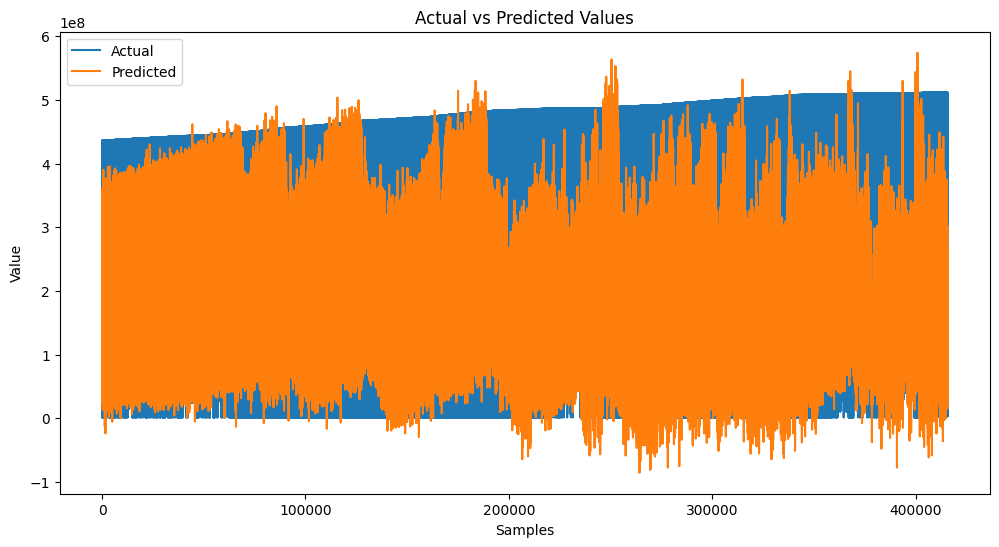

In [38]:
plt.figure(figsize=(12, 6))
plt.plot(y_test_inv[:, feature_index], label='Actual')
plt.plot(y_pred_inv[:, feature_index], label='Predicted')
plt.title('Actual vs Predicted Values')
plt.xlabel('Samples')
plt.ylabel('Value')
plt.legend()
plt.show()

In [39]:
model.save('lstm_model.h5')

C:\Users\15205\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


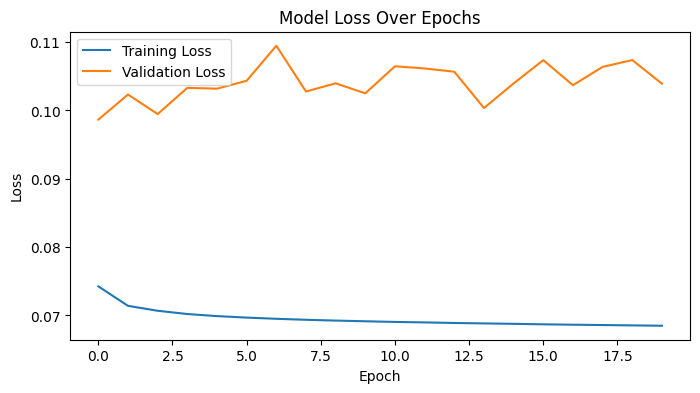

In [40]:
plt.figure(figsize=(8, 4))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [41]:
last_sequence = data_scaled[-seq_length:]

In [42]:
last_sequence = np.expand_dims(last_sequence, axis=0)

In [43]:
future_prediction = model.predict(last_sequence)

1/1 [==============================] - 0s 17ms/step


In [44]:
future_prediction_inv = scaler.inverse_transform(future_prediction)

In [45]:
print("Future Prediction (original scale):")
print(future_prediction_inv)

Future Prediction (original scale):
[[1.1685704e+08 1.0721664e+03 6.7265868e-01 8.1106528e+07 6.3999908e+01
  6.6277874e-01]]


In [47]:
y_pred_binary = (y_pred > 0.5).astype(int)

In [48]:
y_test_binary = y_test.astype(int)

In [52]:
print(f"y_test_binary shape: {y_test_binary.shape}")
print(f"y_pred_binary shape: {y_pred_binary.shape}")

y_test_binary shape: (415586, 6)
y_pred_binary shape: (415586, 6)


In [50]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score

In [53]:
if len(y_test_binary.shape) > 1 and y_test_binary.shape[1] == 1:
    y_test_binary = y_test_binary.ravel()  # Convert (n_samples, 1) to (n_samples,)

if len(y_pred_binary.shape) > 1 and y_pred_binary.shape[1] == 1:
    y_pred_binary = y_pred_binary.ravel()  # Convert (n_samples, 1) to (n_samples,)

In [54]:
y_test_binary = np.argmax(y_test_binary, axis=1)  # Convert one-hot to class labels
y_pred_binary = np.argmax(y_pred_binary, axis=1) 

In [57]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score

accuracy = accuracy_score(y_test_binary, y_pred_binary)
conf_matrix = confusion_matrix(y_test_binary, y_pred_binary)
precision = precision_score(y_test_binary, y_pred_binary, average='weighted', zero_division=0)
recall = recall_score(y_test_binary, y_pred_binary, average='weighted', zero_division=0)


print(f"Accuracy: {accuracy * 100:.4f}%")
print("Confusion Matrix:")
print(conf_matrix)
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

Accuracy: 31.6541%
Confusion Matrix:
[[115269  91932  23165  36604      0]
 [   118    105     12     18      0]
 [ 70071  37390  16176  10807      0]
 [     0      1      0      0      0]
 [  5284   3489   1309   3836      0]]
Precision: 0.5169
Recall: 0.3165


In [46]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)   # Adjust pos_label based on your dataset




ValueError: continuous-multioutput is not supported

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from art.estimators.classification.scikitlearn import ScikitlearnSVC
from sklearn.svm import SVC
from art.attacks.evasion import FastGradientMethod as FGM
from art.utils import load_dataset

from art.estimators.estimator import BaseEstimator as bse
from art.estimators.estimator import LossGradientsMixin

from art.attacks.evasion import DeepFool
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score